In [8]:
import numpy as np
import pandas as pd


In [9]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [10]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.shape

(5572, 5)

In [12]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
df.sample(5)

,v1,v2
1343,ham,Crazy ar he's married. ÌÏ like gd looking guys...
1280,ham,Oh ho. Is this the first time u use these type...
2210,ham,Just wanted to say holy shit you guys weren't ...
947,ham,Hey i booked the kb on sat already... what oth...
4475,ham,I'll pick you up at about 5.15pm to go to taun...


In [14]:
# rename coulmn
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [16]:
df.sample(5)

,target,text
4856,0,Thanks and ! Or bomb and date as my phone wan...
2082,0,I'm done oredi...
3797,0,"Feb &lt;#&gt; is \I LOVE U\"" day. Send dis t..."
3295,0,Hi there. We have now moved in2 our pub . Woul...
5401,0,Babes I think I got ur brolly I left it in Eng...


In [17]:
#check missing value
df.isnull().sum()

,0
target,0
text,0


In [18]:
# check duplicates
df.duplicated().sum()

np.int64(403)

In [19]:
df.dropna(inplace=True)  # don't assign it to df again
df = df.drop_duplicates()  # now this will work


In [20]:
# EDA
df.value_counts(['target'])

,count
target,
0,4516
1,653


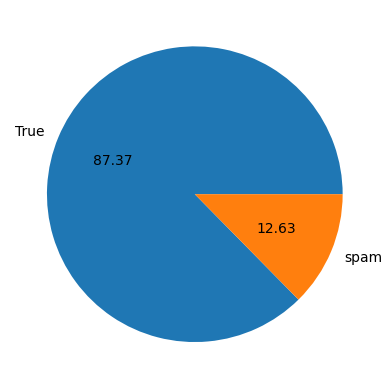

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['True','spam'],autopct="%0.2f")
plt.show()

In [22]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [23]:
df['num_char']=df['text'].apply(len)

In [24]:
df['num_words'] =df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [25]:
df['num_senten'] =df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,target,text,num_char,num_words,num_senten
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_char','num_words','num_senten']].describe()

,num_char,num_words,num_senten
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# for spam
df[df['target']==1][['num_char','num_words','num_senten']].describe()

,num_char,num_words,num_senten
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
# for not spam
df[df['target']==0][['num_char','num_words','num_senten']].describe()

,num_char,num_words,num_senten
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_char', ylabel='Count'>

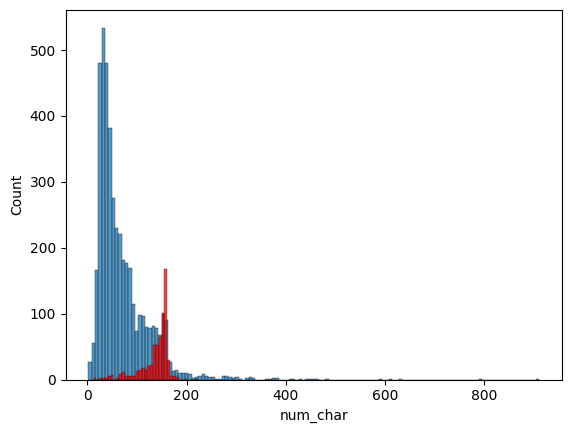

In [30]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_char'])
sns.histplot(df[df['target']==1]['num_char'],color='red')

<Axes: >

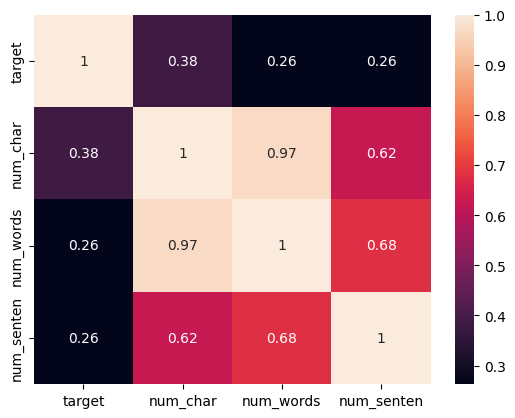

In [31]:
sns.heatmap(df[['target','num_char','num_words','num_senten']].corr(),annot=True)

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
# Data Preprocessing
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [37]:
from nltk.corpus import stopwords
df['trans_text']=df['text'].apply(transform_text)

In [38]:
    pip install wordcloud

In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [40]:
spam_wc = wc.generate(df[df['target']==1]['trans_text'].str.cat(sep=" "))

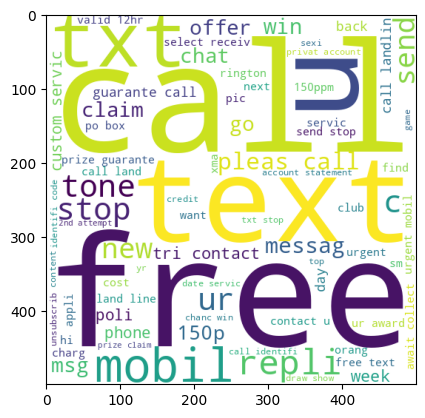

In [41]:
plt.imshow(spam_wc)

In [42]:
spam_corpus = []
for msg in df[df['target'] == 1]['trans_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


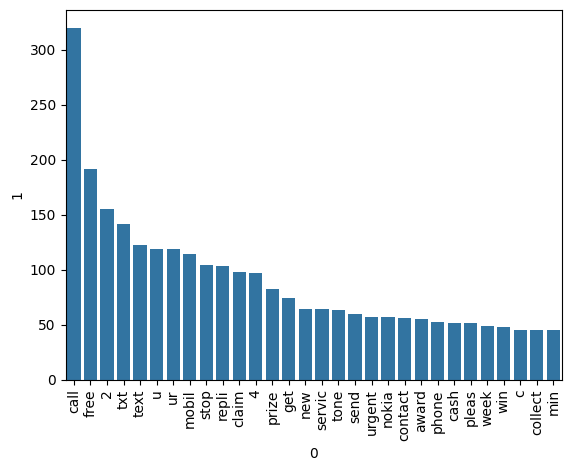

In [43]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [44]:
# Building model

In [45]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
Tfidf = TfidfVectorizer(max_features=3000)

In [46]:
#X=cv.fit_transform(df['trans_text']).toarray()

In [47]:
X=Tfidf.fit_transform(df['trans_text']).toarray()

In [48]:
X.shape

(5169, 3000)

In [49]:
y=df['target'].values

In [50]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [53]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print (precision_score(y_test,y_pred1))

0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [54]:
#best precision as data imbalance precision matters more then accuracy
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print (precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [55]:
bnb.fit(X_train,y_train)
y_pred1=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print (precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
lrc = LogisticRegression()
svc = SVC(kernel='sigmoid',gamma=1.0)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [58]:
model={      'LR': lrc,
       'SVC' : svc,
    'RF': rfc,
    'AdaBoost': abc,
    'GBDT':gbdt}

In [59]:
def train_classifier(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [60]:
accuracy_scores = []
precision_scores = []

for name, model in model.items():

    current_accuracy,current_precision = train_classifier(model, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  LR
Accuracy -  0.9545454545454546
Precision -  0.9789473684210527
For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9826086956521739
For  AdaBoost
Accuracy -  0.9216634429400387
Precision -  0.8202247191011236
For  GBDT
Accuracy -  0.9506769825918762
Precision -  0.9306930693069307


In [61]:
import pickle
pickle.dump(Tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))